Authors: A.Radhakrishnan, GFDL
Ack: Anderson Banihirwe for intake-esm updates, GFDL colleagues for data

In [41]:
import intake_esm
import intake
import xarray as xr

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


esgf-world.json is the ESM collections spec file for the netCDF data in the S3 bucket esgf-world. 
The catalog is updated on an on-demand basis for now. 
You can refer to https://github.com/aradhakrishnanGFDL/gfdl-aws-analysis/tree/community/esm-collection-spec-examples for the most recent catalogs
More examples can be found in https://github.com/aradhakrishnanGFDL/gfdl-aws-analysis/tree/community/examples 


In [42]:
col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
#col_url = "https://raw.githubusercontent.com/aradhakrishnanGFDL/gfdl-aws-analysis/community/esm-collection-spec-examples/esgf-world.json"

In [43]:
col = intake.open_esm_datastore(col_url)

In [44]:
col.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,AERmon,r1i1p1f1,gn,ps,185001-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
1,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,CFmon,r1i1p1f1,gn,ta,185001-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
2,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snc,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
3,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snd,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
4,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snw,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056261,CMIP6,UA,MCM-UA-1-0,ssp585,mon,atmos,Amon,r1i1p1f2,gn,rlut,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
1056262,CMIP6,UA,MCM-UA-1-0,ssp585,mon,atmos,Amon,r1i1p1f2,gn,rtmt,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
1056263,CMIP6,UA,MCM-UA-1-0,ssp585,mon,ocean,Omon,r1i1p1f2,gn,sos,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
1056264,CMIP6,UA,MCM-UA-1-0,ssp585,mon,ocean,Omon,r1i1p1f2,gn,tos,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...


# Search for all historical runs with TAS

In [121]:
expname_filter = ['historical']
variable_id_filter = "tas"
cat = col.search(experiment_id=expname_filter, variable_id=variable_id_filter)
cat.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,AS-RCEC,TaiESM1,historical,mon,atmos,Amon,r1i1p1f1,gn,tas,185001-201412,v20200218,s3://esgf-world/CMIP6/CMIP/AS-RCEC/TaiESM1/his...
1,CMIP6,AS-RCEC,TaiESM1,historical,mon,atmos,Amon,r1i1p1f1,gn,tas,185001-201412,v20200623,s3://esgf-world/CMIP6/CMIP/AS-RCEC/TaiESM1/his...
2,CMIP6,AWI,AWI-CM-1-1-MR,historical,3hr,na,3hr,r1i1p1f1,gn,tas,185101010300-185201010000,v20181218,s3://esgf-world/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/h...
3,CMIP6,AWI,AWI-CM-1-1-MR,historical,3hr,na,3hr,r1i1p1f1,gn,tas,185601010300-185701010000,v20181218,s3://esgf-world/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/h...
4,CMIP6,AWI,AWI-CM-1-1-MR,historical,3hr,na,3hr,r1i1p1f1,gn,tas,186601010300-186701010000,v20181218,s3://esgf-world/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,CMIP6,SNU,SAM0-UNICON,historical,NaN,NaN,day,r1i1p1f1,gn,tas,20070101-20071231,v20190323,s3://esgf-world/CMIP6/CMIP/SNU/SAM0-UNICON/his...
2212,CMIP6,THU,CIESM,historical,mon,atmos,Amon,r1i1p1f1,gr,tas,185001-201412,v20191228,s3://esgf-world/CMIP6/CMIP/THU/CIESM/historica...
2213,CMIP6,THU,CIESM,historical,mon,atmos,Amon,r1i1p1f1,gr,tas,185001-201412,v20200417,s3://esgf-world/CMIP6/CMIP/THU/CIESM/historica...
2214,CMIP6,THU,CIESM,historical,mon,atmos,Amon,r2i1p1f1,gr,tas,185001-201412,v20191228,s3://esgf-world/CMIP6/CMIP/THU/CIESM/historica...


## Search for GFDL-ESM4 atmos monthly surface temperature 

In [ ]:
expname_filter = ['historical']
table_id_filter = 'Amon'
model_filter = 'GFDL-ESM4'
variable_id_filter = "tas"
ens_filter = "r1i1p1f1"
version_filter = "v20190726"

cat = col.search(experiment_id=expname_filter, table_id=table_id_filter,source_id=model_filter,variable_id=variable_id_filter,version="v20190726")

In [46]:
cat.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,NOAA-GFDL,GFDL-ESM4,historical,mon,atmos,Amon,r1i1p1f1,gr1,tas,185001-194912,v20190726,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...
1,CMIP6,NOAA-GFDL,GFDL-ESM4,historical,mon,atmos,Amon,r1i1p1f1,gr1,tas,195001-201412,v20190726,s3://esgf-world/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4...


# Let us make organize this data frame into an xarray dataset  


In [47]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time': 1}},storage_options={'anon':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


# What are the keys? What do they mean to us? 

In [48]:
dset_dict.keys() 

dict_keys(['CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Amon'])

In [49]:
dset_dict['CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Amon']

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, member_id: 1, time: 1980)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1, 180, 288), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    contact:                 gfdl.climate.model.info@noaa.gov
    physics_index:           [1]
    sub_experiment:          none
    parent_source_id:        GFDL-ESM4
    source_id:               GFDL-ESM4
    forcing_index:           [1]
    parent_experiment_id:    piControl
    product:                 model-output
    intake_esm_varname:      ['tas']
    history:                 File was processed by fremetar (GFDL analog of C...
    branch_time_in_parent:   [36500.]
    experiment:              all-forcing simulation of the recent past
    institution:             National Oceanic and Atmospheric Administration,...
    parent_activity_id:      CMIP
    branch_method:           standard
    institution_id:          NOAA-GFDL
    realm:                   atmos
    tracking_id:             hdl:21.14100/75e5c5a7-d7c4-4860-beb1-db454f25f13...
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    title:                   NOAA GFDL GFDL-ESM4 model output prepared for CM...
    variable_id:             tas
    activity_id:             CMIP
    parent_mip_era:          CMIP6
    branch_time_in_child:    [0.]
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    table_id:                Amon
    parent_time_units:       days since 0001-1-1
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    comment:                 <null ref>
    nominal_resolution:      100 km
    variant_info:            N/A
    source:                  GFDL-ESM4 (2018):\natmos: GFDL-AM4.1 (Cubed-sphe...
    sub_experiment_id:       none
    grid:                    atmos data regridded from Cubed-sphere (c96) to ...
    realization_index:       [1]
    variant_label:           r1i1p1f1
    data_specs_version:      01.00.27
    references:              see further_info_url attribute
    initialization_index:    [1]
    grid_label:              gr1
    mip_era:                 CMIP6
    source_type:             AOGCM AER CHEM BGC
    parent_variant_label:    r1i1p1f1
    external_variables:      areacella
    experiment_id:           historical
    intake_esm_dataset_key:  CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Amon

In [50]:
hxr_gfdl_esm4 = dset_dict["CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Amon"]

# Where is my xarray data array? 

In [51]:
hxr_gfdl_esm4.tas

,Array,Chunk
Bytes,410.57 MB,207.36 kB
Shape,"(1, 1980, 180, 288)","(1, 1, 180, 288)"
Count,5942 Tasks,1980 Chunks
Type,float32,numpy.ndarray


# Enjoy the analysis

### I just want 1994-2014

In [124]:
tas1 = hxr_gfdl_esm4.tas.sel(time=slice("1994", "2014"))

In [104]:
tas1

,Array,Chunk
Bytes,52.25 MB,207.36 kB
Shape,"(1, 252, 180, 288)","(1, 1, 180, 288)"
Count,6194 Tasks,252 Chunks
Type,float32,numpy.ndarray


In [127]:
tas1D = tas1.isel(lat=10, lon=10)

### I just want a 1D plot 

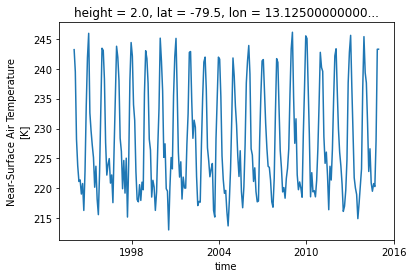

In [108]:
#not on binder# tas1D.plot()

### I just want to spot check

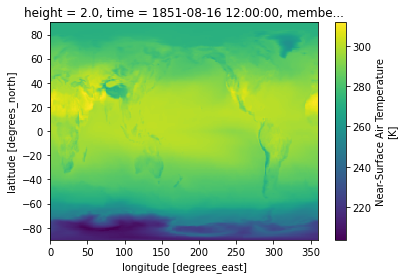

In [133]:
hxr_gfdl_esm4.tas.isel(time=19).plot()

### I just want a fancy line plot such that the data are on the x-axis and a dimension is on the y-axis. 

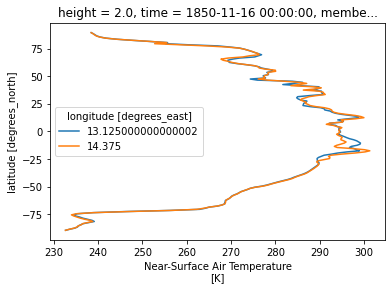

In [113]:
hxr_gfdl_esm4.tas.isel(time=10, lon=[10, 11]).plot(y="lat", hue="lon")

### I just want to do a Zonal mean or something like that. Exercise: Fix the cell before. Use the data array we are working with in place of air.can you swap?

In [116]:
air_grp = air.mean(["time", "lon"])

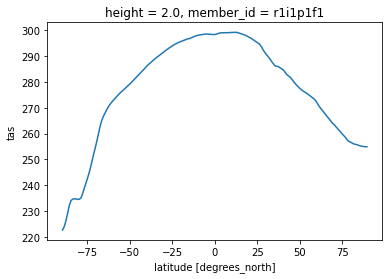

In [117]:
air_grp.plot()